
## Assignment Information

| Field | Details |
|-------|---------|
| **Name** | Pros Loung |
| **Course** | AAI-521 Applied Computer Vision for AI |
| **Assignment** | 1.1 - Image Processing and Neural Networks |
| **GitHub Repository** | https://github.com/ploung/AAI_521_ComputerVision_Module1.git |

---

### Assignment Overview
- Part 1: Neural Network 

    - Develop Neural Network model for classifying Keras fashion dataset
    
- Part 2: Image Processing

### Part 1: Network Network

In [ ]:
#Load the necessary libraries
import tensorflow as tf
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
# Load the fashion dataset from Keras and split into training and test sets
fashion_mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [ ]:
# Dataset exploration
print(f'\nTraining dataset shape: {x_train.shape}')
print(f'\nTraining labels shape: {y_train.shape}')
print(f'\nTest dataset shape: {x_test.shape}')
print(f'\nTest labels shape: {y_test.shape}')
print(f'\nPixel values of the first image in the training set:\n{x_train[0]}')

In [ ]:
# Display the first 25 images with label name of each image printed under the image.
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]])
plt.tight_layout()
plt.show()

In [ ]:
# # flatten 28*28 images to a 784 vector for each image
IMG_HEIGHT=28
IMG_WIDTH= 28
#channels =1 

# Normalize the data (both train and test) by scaling pixel values to the range of 0 to 1 by dividing by 255.0
x_train, x_test = x_train / 255.0, x_test / 255.0

# Build the model
loss_function = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False)
model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_HEIGHT, IMG_WIDTH)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(
    optimizer='adam',
    loss=loss_function,
    metrics=['accuracy'])

# Train the model with 20% validation, 20 epochs, batch size 128
history = model.fit(
    x_train, 
    y_train,
    epochs=20,
    batch_size=128,
    validation_split=0.2,
    verbose=1)

In [ ]:
# Display training history keys for building plots
history.history.keys()

In [ ]:
# Plot training & validation accuracy
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

### Summary: Model Explanation and Observation

The model uses a Neural Network to train and classify fashion images from Keras `fashion_mnist`. This implementation demonstrates a complete machine learning pipeline for image classification, which consists of:
1)	Data Loading and Preparation:
    - Load and split the dataset into `X_train`, `y_train`, `X_test`, and `y_test`

2)	 Data Visualization: Display the first 25 images with labels printed below each image

3)	Image Preprocessing: Normalization of the images by dividing pixel values by 255 to convert from range [0-255] to [0-1]. This help neural networks train faster and more stable and prevent gradient explosion and improves convergence

4)	Model Architecture: Linear classification model using Keras Sequential API
    - Input Layer: Flatten layer converts 28×28 images to 784-dimensional vectors
    - Hidden Layer: Dense layer with 128 neurons using ReLU activation function
    - Output Layer: Dense layer with 10 neurons using Softmax activation (for 10 fashion classes)
    - Linear classification model using Keras Sequential API

5)	Model Compilation:
    - Optimizer: Adam optimizer for efficient gradient descent
    - Loss Function: Sparse Categorical Crossentropy (suitable for multi-class classification)
    - Metrics: Accuracy for performance evaluation

6)	Model Training:
    -   Training data: `X_train` and `y_train` datasets
    - Validation Split: 20% of training data reserved for validation
    - Epochs: 20 training iterations
    - Batch Size: 128 images per batch for efficient processing

Model Accuracy Graph Observations:
- Both training and validation accuracy increase steadily
- The model accuracy seems to still improving after 20th epoch. Thus, it can benefit with more training.

Model Loss Graph Observations:
- Both training and validation loss decrease consistently
- Both training and validation loss are the same level after 20th epoch, indicating good learning prorgess. 
- Shows convergence of the optimization process

In [ ]:
pred = model.predict(x_test)
predictions = np.argmax(pred, axis=1)

print("=" * 80)
print("Display the first 25 test images along with their true and predicted labels")
print("=" * 80)

plt.figure(figsize=(10, 8))  
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_test[i]])
    plt.title(f'Predicted: {class_names[predictions[i]]}')
plt.tight_layout()
plt.show()

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f'\nTest accuracy: {test_accuracy}')
print(f'Test loss: {test_loss}')

## Part 2 - Image Processing

In [ ]:
# Reference: https://www.tensorflow.org/tutorials/load_data/images

# Import additional libraries for working with images
import tensorflow as tf
import pathlib
from PIL import Image
import urllib.request
import tarfile
import os

# Download the flower dataset from TensorFlow repository
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"

data_dir = tf.keras.utils.get_file(
    fname='flower_photos', 
    origin=dataset_url, 
    untar=True)

data_dir = pathlib.Path(data_dir)

print(f"Raw data_dir: {data_dir}")
print(f"Data downloaded to: {data_dir}")
print(f"Directory exists: {data_dir.exists()}")

# Check if data_dir is pointing to a file instead of directory
if data_dir.is_file():
    print("data_dir is pointing to a file, adjusting...")
    data_dir = data_dir.parent / 'flower_photos'
    
print(f"Final data_dir: {data_dir}")
print(f"Dataset structure: {list(data_dir.iterdir()) if data_dir.exists() else 'Directory not found'}")

**a) How many images we can find in this datset?**

In [ ]:
print("=" * 55)
print("PART 2A: Counting the total number of images in dataset")
print("=" * 55)

# Check if there's a nested flower_photos directory
nested_dir = data_dir / 'flower_photos'
if nested_dir.exists():
    print(f"Found nested directory: {nested_dir}")
    data_dir = nested_dir
    print(f"Updated data_dir to: {data_dir}")

# Get flower classes from directory structure
class_names = [item.name for item in data_dir.iterdir() if item.is_dir()]
print(f"Number of flower types (classes): {len(class_names)}")
print(f"Flower types: {sorted(class_names)}")

print(f"\nDetailed count per flower type:")
print("-" * 40)
total_dataset_count = 0

for class_name in sorted(class_names):
    class_count = len(list(data_dir.glob(f'{class_name}/*.jpg')))
    total_dataset_count += class_count
    print(f"{class_name:12}: {class_count:4d} images")

print("-" * 40)
print(f"{'TOTAL':12}: {total_dataset_count:4d} images")
print("="*50)

In [ ]:
# Uncomment the following lines if PILLOW is not installed
#!pip install pillow

import matplotlib.pyplot as plt
from PIL import Image

**b) Display one flower from each subfolder**

In [ ]:
print("=" * 80)
print("PART 2B: Use Pillow (PIL) to show at least one flower image from each subfolder")
print("=" * 80)

# Create a figure to display images
plt.figure(figsize=(15, 10))


for i, class_name in enumerate(sorted(class_names)):
    # Get the first image from each class using data_dir.glob as suggested
    image = data_dir.glob(f'{class_name}/*')  # Similar to data_dir.glob('tulips/*')
    image_paths = list(image)

    if image_paths:  # Check if there are images in the folder
        # Load and display the first image using PIL
        image_path = image_paths[0]
        
        # Open image with PIL (Pillow)
        image = Image.open(image_path)
        
        # Display in subplot
        plt.subplot(1, 5, i + 1)
        plt.imshow(image)
        plt.title(f'{class_name}\nImage size: {image.size}\nFile: {image_path.name}')
        plt.axis('off')
        
        # Print image details
        print(f"{class_name:12}: {image_path.name}")
        print(f"             Size: {image.size} (width x height)")
        print(f"             Mode: {image.mode}")
        print(f"             Path: {image_path}")
        print()
    else:
        print(f"No images found in {class_name} folder")

plt.tight_layout()
plt.show()

**2C) Use Keras to resize all the image into same dimension 180x180.**

In [ ]:
# Load the dataset with Keras and apply preprocessing to resize images to 180x180
batch_size = 32
img_height = 180
img_width = 180

print("=" * 62)
print("PART 2C: Load dataset with Keras and resize images to 180x180")
print("=" * 62)

print("\nCreating training and validation dataset...")
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="training",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
class_names = train_dataset.class_names
print(f'Training class names: {class_names}')

print("\nCreating validation dataset...")
val_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    data_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(img_height, img_width),
    batch_size=batch_size
)
class_names = val_dataset.class_names
print(f'Validation class names: {class_names}')

d) **You can use** `train_ds.class_names` **command to get the list of labels. Write a code to randomly show 9 images from training data while printing their label on top of the image.**

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_dataset.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(train_dataset.class_names[labels[i]])
        plt.axis("off")
plt.tight_layout()
plt.show()

**Analysis: Barriers for Proper Classification**

After carefully reviewing the flower images displayed above, several barriers can be identified that may affect proper classification:

**1. Background Complexity**
- Many images have complex, natural backgrounds (gardens, fields, other plants)
- Background elements can confuse the model and draw attention away from the flower itself
- Some flowers are photographed in their natural habitat with multiple competing visual elements

**2. Lighting and Color Variations**
- Significant variations in lighting conditions (bright sunlight, shadows, overcast)
- Color saturation and exposure differences can make the same flower type appear very different
- Some images are taken with artificial lighting while others in natural light

**3. Scale and Perspective Issues**
- Flowers appear at different scales - some close-ups, some distant shots
- Different viewing angles (top-down, side view, angled perspective)
- Some images show single flowers while others show multiple flowers or clusters

***4. Occlusion and Partial Views**
- Parts of flowers may be hidden by leaves, stems, or other flowers
- Some images show only partial views of the flower
- Overlapping petals or flowers can obscure distinctive features

**5. Intra-class Variability**
- Different varieties within the same flower type (e.g., different tulip colors/shapes)
- Natural variations in flower appearance (size, petal count, color intensity)
- Flowers at different stages of blooming (buds, fully open, wilting)

**6. Image Quality Variations**
- Different resolutions and image qualities in the original dataset
- Some images may be blurry or out of focus
- Varying degrees of compression artifacts

**7. Seasonal and Growth Stage Differences**
- Flowers photographed at different stages of their life cycle
- Seasonal variations affecting appearance
- Some flowers may have additional elements like stems, leaves, or seed pods

**Recommendations to Improve Classification:**
1. **Data Augmentation**: Apply rotations, flips, and color adjustments to increase robustness
2. **Preprocessing**: Standardize lighting and contrast
3. **Feature Focus**: Use attention mechanisms to focus on flower-specific features
4. **Multi-scale Training**: Train with images at different scales
5. **Background Subtraction**: Consider techniques to reduce background influence

**e) Now, we want to use preprocessing package in Keras to apply different filters to the image. Apply the following procedures to image data:**
- *Rescale the image by dividing by 255*
- *Shear the image 20%*
- *Zoom the image 20%*
- *Horizontally flip the images*

In [ ]:
# Apply data augmentation and preprocessing using Keras
print("=" * 70)
print("PART 2E: Apply preprocessing filters to image data")
print("=" * 70)

from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Create ImageDataGenerator with the specified augmentation parameters
data_gen = ImageDataGenerator(
    rescale=1./255,           # Rescale images by dividing by 255
    shear_range=0.2,          # Shear the image 20%
    zoom_range=0.2,           # Zoom the image 20%
    horizontal_flip=True,     # Horizontally flip the images
    validation_split=0.2      # Split data for validation
)

print("Data augmentation parameters:")
print("- Rescale: 1/255 (normalize pixel values to 0-1 range)")
print("- Shear range: 0.2 (20% shear transformation)")
print("- Zoom range: 0.2 (20% zoom in/out)")
print("- Horizontal flip: True (randomly flip images horizontally)")
print("- Validation split: 0.2 (20% for validation)")

In [ ]:
# Apply the data generator to create training and validation datasets
target_size = (180, 180)
batch_size = 32

# Training dataset with augmentation
train_generator = data_gen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True,
    seed=123
)

# Validation dataset (only rescaling, no augmentation for validation)
val_data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

val_generator = val_data_gen.flow_from_directory(
    data_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False,
    seed=123
)

print(f"\nTraining dataset: {train_generator.samples} images")
print(f"Validation dataset: {val_generator.samples} images")
print(f"Number of classes: {train_generator.num_classes}")
print(f"Class indices: {train_generator.class_indices}")

In [ ]:
# Visualize the effects of data augmentation
import numpy as np

print("\n" + "="*60)
print("VISUALIZING DATA AUGMENTATION EFFECTS")
print("="*60)

# Function to display original and augmented images
def show_augmentation_effects(generator, num_images=6):
    """Display original and augmented versions of images"""
    
    # Get a batch of images
    batch = next(generator)
    images = batch[0]
    labels = batch[1]
    
    plt.figure(figsize=(15, 10))
    
    for i in range(min(num_images, len(images))):
        # Display augmented image
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i])
        class_name = list(generator.class_indices.keys())[np.argmax(labels[i])]
        plt.title(f'Augmented: {class_name}')
        plt.axis('off')
    
    plt.suptitle('Examples of Augmented Images\n(Rescaled, Sheared, Zoomed, and/or Flipped)', fontsize=14)
    plt.tight_layout()
    plt.show()

# Show examples of augmented images
show_augmentation_effects(train_generator, num_images=6)

## Summary of Data Augmentation Implementation

### Applied Preprocessing Filters:

1. **Rescaling (Normalization)**
   - **Operation**: Divide pixel values by 255
   - **Purpose**: Convert pixel values from range [0, 255] to [0, 1]
   - **Benefit**: Helps neural networks train faster and more stable

2. **Shear Transformation (20%)**
   - **Operation**: Apply shear transformation with range ±20%
   - **Purpose**: Simulate different viewing perspectives
   - **Benefit**: Makes model robust to perspective distortions

3. **Zoom Transformation (20%)**
   - **Operation**: Random zoom in/out by ±20%
   - **Purpose**: Simulate different distances from subject
   - **Benefit**: Handles flowers at various scales in images

4. **Horizontal Flip**
   - **Operation**: Randomly flip images horizontally (50% chance)
   - **Purpose**: Increase dataset diversity
   - **Benefit**: Flowers can appear from left or right, model learns symmetry

### Key Benefits of This Augmentation Strategy:

- **Increased Dataset Size**: Virtually expands training data without collecting new images
- **Improved Generalization**: Model becomes robust to various transformations
- **Reduced Overfitting**: More diverse training examples prevent memorization
- **Better Real-world Performance**: Model handles natural variations in flower photos

### Technical Implementation:
- Used `ImageDataGenerator` from Keras for efficient augmentation
- Applied augmentation only to training data (validation uses only rescaling)
- Maintained original image resolution (180x180) while applying transformations
- Ensured reproducibility with fixed random seed

## Part - 3 Open CV

Now use OpenCV for preprocessing. Show the first 9 images in the dataset using OpenCV. Before showing each image, resize
the images to 180 x 180. Note that images are not in normal color. Convert images into colorful ones with normal coloring.


In [ ]:
# Uncomment to install and import OpenCV
#!pip install opencv-python

import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
from pathlib import Path

In [46]:
print("=" * 60)
print("Resizing the 9 images to 180x180 resize using OpenCV")
print("=" * 60)


def get_first_9_images_opencv(data_directory, target_size=(180, 180)):
    """
    Load the first 9 images from the flower dataset using OpenCV
    and resize them to the target size.
    """
    images = []
    labels = []
    image_paths = []
    
    # Get all image files from all class directories
    all_image_paths = []
    for class_dir in sorted(data_directory.iterdir()):
        if class_dir.is_dir():
            class_images = list(class_dir.glob('*.jpg'))
            for img_path in class_images:
                all_image_paths.append((img_path, class_dir.name))
    
    # Take first 9 images
    for i, (img_path, class_name) in enumerate(all_image_paths[:9]):
        # Load image using OpenCV (BGR format)
        img_bgr = cv2.imread(str(img_path))
        
        if img_bgr is not None:
            # Resize image to target size using OpenCV
            img_resized = cv2.resize(img_bgr, target_size)
            
            images.append(img_resized)
            labels.append(class_name)
            image_paths.append(img_path)
            
            print(f"Image {i+1}: {img_path.name} ({class_name}) - Original: {img_bgr.shape}, Resized: {img_resized.shape}")
    
    return images, labels, image_paths

# Load first 9 images using OpenCV
opencv_images, opencv_labels, opencv_paths = get_first_9_images_opencv(data_dir)


Resizing the 9 images to 180x180 resize using OpenCV
Image 1: 100080576_f52e8ee070_n.jpg (daisy) - Original: (263, 320, 3), Resized: (180, 180, 3)
Image 2: 10140303196_b88d3d6cec.jpg (daisy) - Original: (313, 500, 3), Resized: (180, 180, 3)
Image 3: 10172379554_b296050f82_n.jpg (daisy) - Original: (215, 320, 3), Resized: (180, 180, 3)
Image 4: 10172567486_2748826a8b.jpg (daisy) - Original: (333, 500, 3), Resized: (180, 180, 3)
Image 5: 10172636503_21bededa75_n.jpg (daisy) - Original: (250, 320, 3), Resized: (180, 180, 3)
Image 6: 102841525_bd6628ae3c.jpg (daisy) - Original: (400, 500, 3), Resized: (180, 180, 3)
Image 7: 1031799732_e7f4008c03.jpg (daisy) - Original: (375, 500, 3), Resized: (180, 180, 3)
Image 8: 10391248763_1d16681106_n.jpg (daisy) - Original: (224, 320, 3), Resized: (180, 180, 3)
Image 9: 10437754174_22ec990b77_m.jpg (daisy) - Original: (240, 171, 3), Resized: (180, 180, 3)



DISPLAYING FIRST 9 IMAGES - BGR FORMAT (OpenCV default)


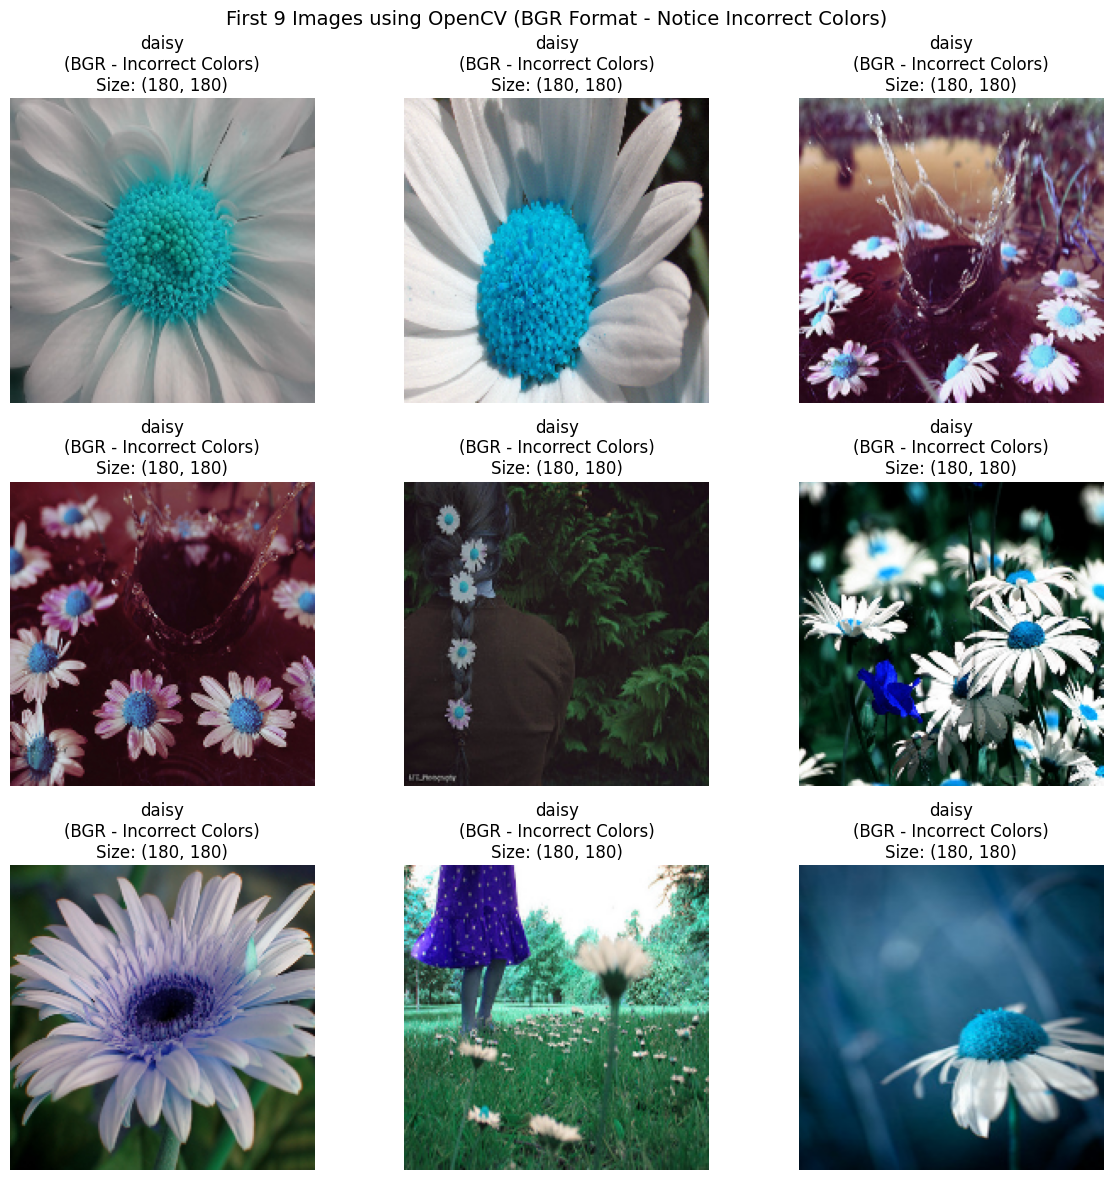


Note: Images appear with incorrect colors because OpenCV loads images in BGR format
while matplotlib expects RGB format for display.


In [47]:
# Part 3A: Display the first 9 images (OpenCV loads in BGR format)
print("\n" + "="*60)
print("DISPLAYING FIRST 9 IMAGES - BGR FORMAT (OpenCV default)")
print("="*60)

plt.figure(figsize=(12, 12))
for i in range(len(opencv_images)):
    plt.subplot(3, 3, i + 1)
    # Display BGR image (will show incorrect colors)
    plt.imshow(opencv_images[i])
    plt.title(f'{opencv_labels[i]}\n(BGR - Incorrect Colors)\nSize: {opencv_images[i].shape[:2]}')
    plt.axis('off')

plt.suptitle('First 9 Images using OpenCV (BGR Format - Notice Incorrect Colors)', fontsize=14)
plt.tight_layout()
plt.show()

print("\nNote: Images appear with incorrect colors because OpenCV loads images in BGR format")
print("while matplotlib expects RGB format for display.")

**Convert images to normal color format (BGR to RGB)**

In [48]:
print("=" * 60)
print("PART 3B: Converting BGR to RGB for Normal Color Display")
print("=" * 60)

def convert_bgr_to_rgb_opencv(bgr_images):
    """
    Convert BGR images to RGB using OpenCV
    """
    rgb_images = []
    for bgr_img in bgr_images:
        # Convert BGR to RGB using OpenCV
        rgb_img = cv2.cvtColor(bgr_img, cv2.COLOR_BGR2RGB)
        rgb_images.append(rgb_img)
    return rgb_images

# Convert all images from BGR to RGB
opencv_rgb_images = convert_bgr_to_rgb_opencv(opencv_images)

print(f"Converted {len(opencv_rgb_images)} images from BGR to RGB format")
print(f"Original BGR shape: {opencv_images[0].shape}")
print(f"Converted RGB shape: {opencv_rgb_images[0].shape}")
print("\nColor channel order:")
print("- BGR: Blue, Green, Red (OpenCV default)")
print("- RGB: Red, Green, Blue (matplotlib/normal display)")

PART 3B: Converting BGR to RGB for Normal Color Display
Converted 9 images from BGR to RGB format
Original BGR shape: (180, 180, 3)
Converted RGB shape: (180, 180, 3)

Color channel order:
- BGR: Blue, Green, Red (OpenCV default)
- RGB: Red, Green, Blue (matplotlib/normal display)



DISPLAYING CONVERTED RGB IMAGES - NORMAL COLORS


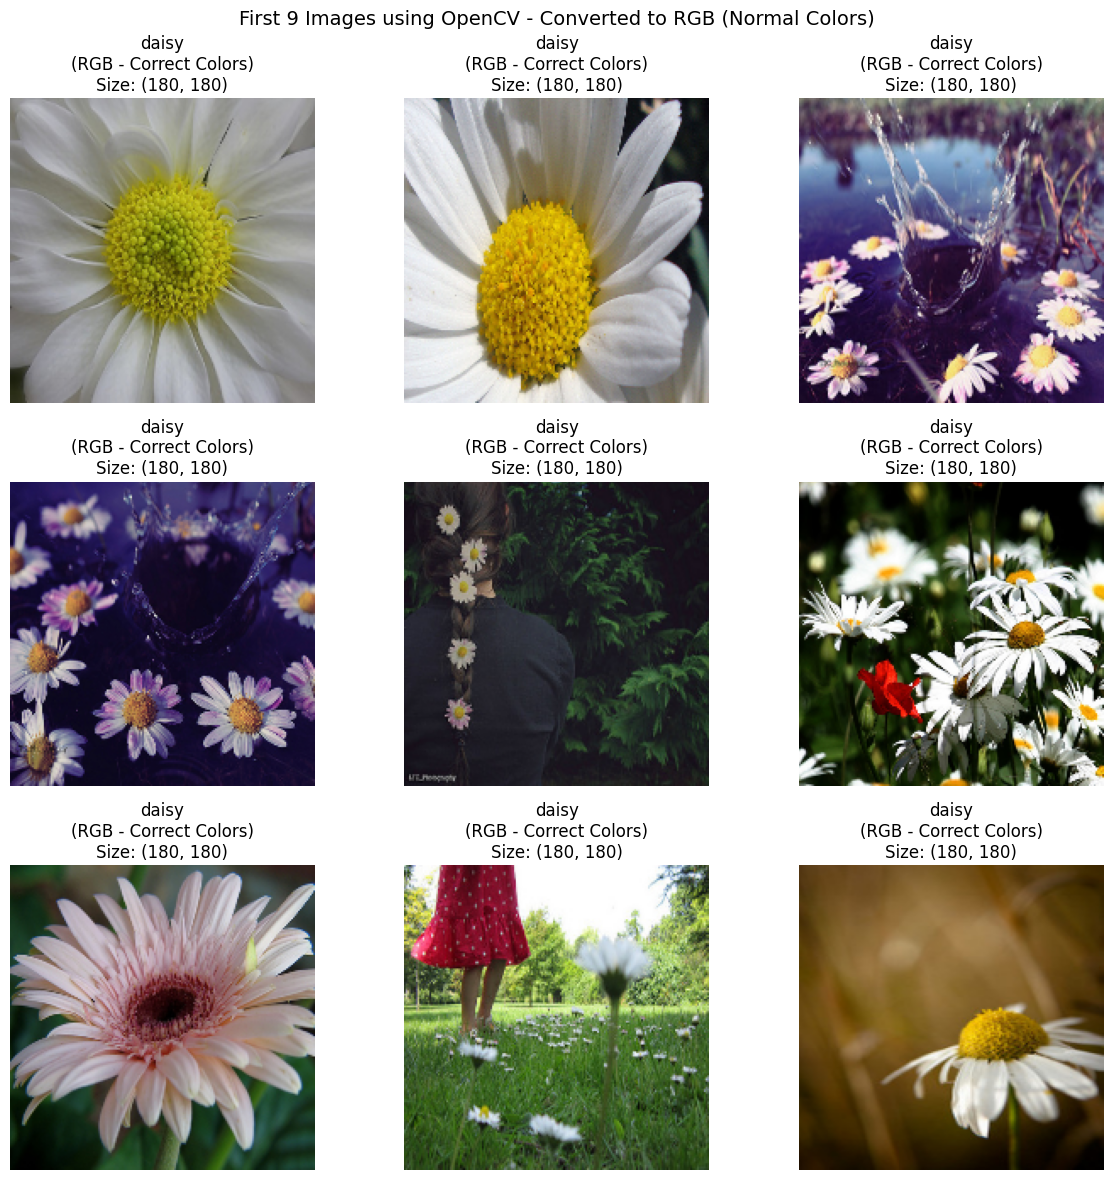


Conversion successful! Images now display with correct colors.
The RGB conversion using cv2.cvtColor(img, cv2.COLOR_BGR2RGB) fixed the color channels.


In [49]:
# Display the corrected RGB images with normal colors
print("\n" + "="*60)
print("DISPLAYING CONVERTED RGB IMAGES - NORMAL COLORS")
print("="*60)

plt.figure(figsize=(12, 12))
for i in range(len(opencv_rgb_images)):
    plt.subplot(3, 3, i + 1)
    # Display RGB image (correct colors)
    plt.imshow(opencv_rgb_images[i])
    plt.title(f'{opencv_labels[i]}\n(RGB - Correct Colors)\nSize: {opencv_rgb_images[i].shape[:2]}')
    plt.axis('off')

plt.suptitle('First 9 Images using OpenCV - Converted to RGB (Normal Colors)', fontsize=14)
plt.tight_layout()
plt.show()

print("\nConversion successful! Images now display with correct colors.")
print("The RGB conversion using cv2.cvtColor(img, cv2.COLOR_BGR2RGB) fixed the color channels.")


SIDE-BY-SIDE COMPARISON: BGR (Incorrect) vs RGB (Correct) Colors


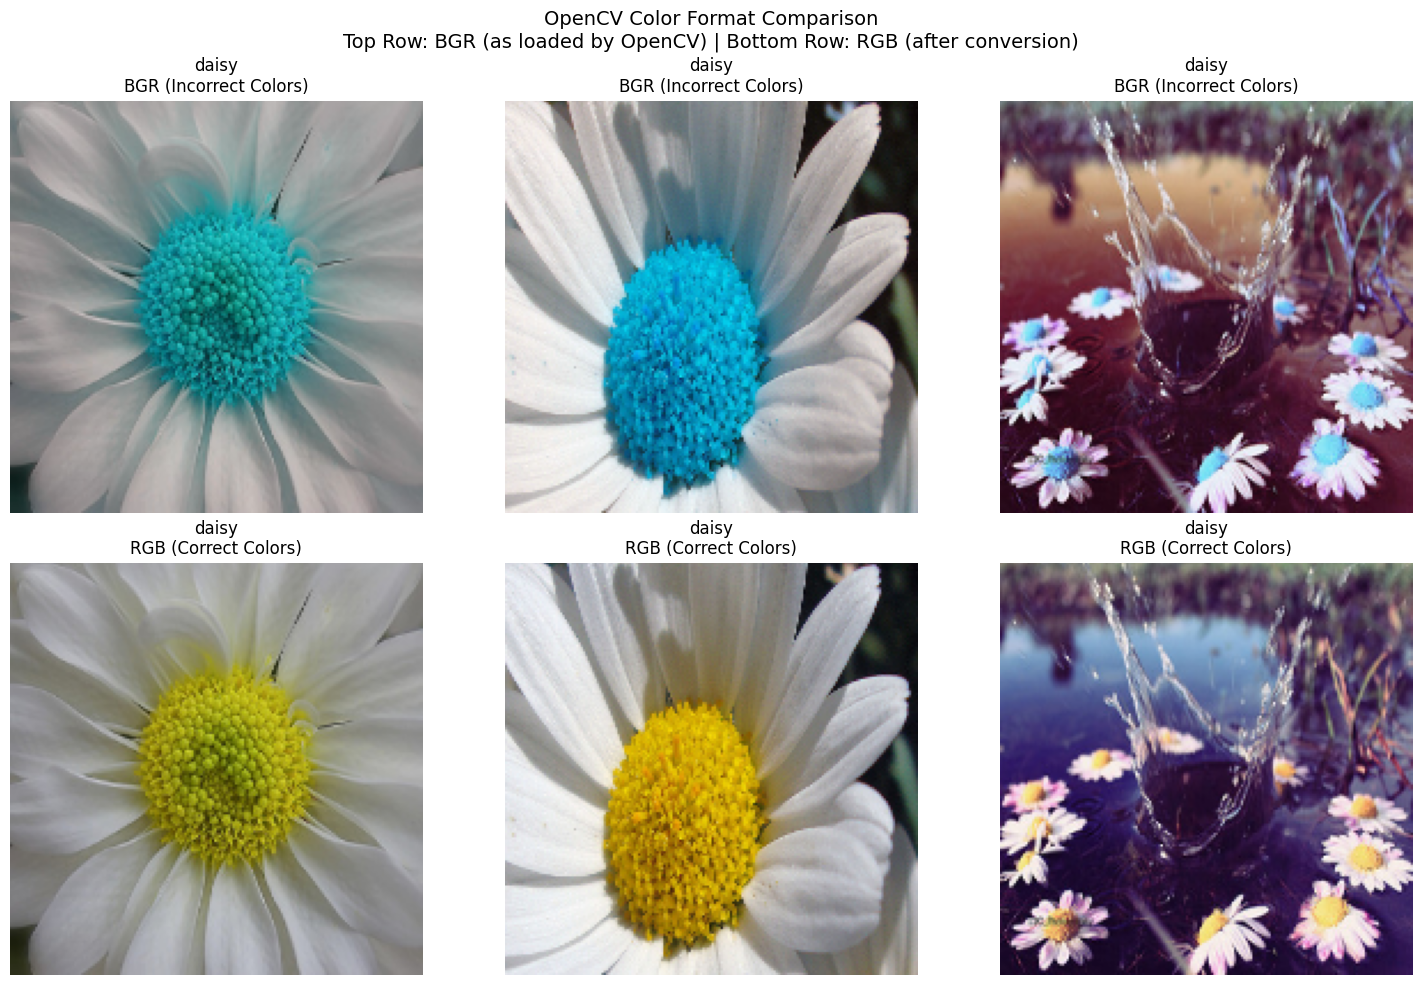


Key Observations:
- OpenCV loads images in BGR (Blue-Green-Red) format by default
- Matplotlib/normal display expects RGB (Red-Green-Blue) format
- Without conversion, red and blue channels are swapped, causing incorrect colors
- cv2.cvtColor(img, cv2.COLOR_BGR2RGB) correctly converts the color channels


In [50]:
# Comparison: Side-by-side BGR vs RGB display
print("\n" + "="*80)
print("SIDE-BY-SIDE COMPARISON: BGR (Incorrect) vs RGB (Correct) Colors")
print("="*80)

# Show comparison for first 3 images
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

for i in range(3):
    # Top row: BGR (incorrect colors)
    axes[0, i].imshow(opencv_images[i])
    axes[0, i].set_title(f'{opencv_labels[i]}\nBGR (Incorrect Colors)')
    axes[0, i].axis('off')
    
    # Bottom row: RGB (correct colors)
    axes[1, i].imshow(opencv_rgb_images[i])
    axes[1, i].set_title(f'{opencv_labels[i]}\nRGB (Correct Colors)')
    axes[1, i].axis('off')

plt.suptitle('OpenCV Color Format Comparison\nTop Row: BGR (as loaded by OpenCV) | Bottom Row: RGB (after conversion)', 
             fontsize=14, y=0.98)
plt.tight_layout()
plt.show()

print("\nKey Observations:")
print("- OpenCV loads images in BGR (Blue-Green-Red) format by default")
print("- Matplotlib/normal display expects RGB (Red-Green-Blue) format")
print("- Without conversion, red and blue channels are swapped, causing incorrect colors")
print("- cv2.cvtColor(img, cv2.COLOR_BGR2RGB) correctly converts the color channels")

## Summary of OpenCV Preprocessing Implementation

**Successfully implemented:**
- Used `cv2.imread()` to load images from the flower dataset
- Applied `cv2.resize()` to resize all images to 180×180 pixels
- Loaded the first 9 images from the dataset across different flower classes
- Demonstrated OpenCV's default BGR color format

### Part 3B: Color Format Conversion
**Successfully implemented:**
- Identified the color format issue (BGR vs RGB)
- Used `cv2.cvtColor(img, cv2.COLOR_BGR2RGB)` to convert color channels
- Displayed side-by-side comparison showing the difference
- Achieved normal, correct color representation

### Key Technical Points:

1. **OpenCV Color Format**
   - OpenCV loads images in **BGR** (Blue-Green-Red) format by default
   - This is different from the standard **RGB** (Red-Green-Blue) format
   - Direct display of BGR images results in red/blue color channel swap

2. **Image Resizing**
   - Used `cv2.resize(image, (width, height))` for consistent 180×180 dimensions
   - OpenCV's resize function handles interpolation automatically
   - Maintains aspect ratio control through specified target dimensions

3. **Color Space Conversion**
   - `cv2.cvtColor()` function provides various color space conversions
   - `COLOR_BGR2RGB` flag specifically handles BGR→RGB conversion
   - Essential for proper display in matplotlib and other RGB-expecting libraries

### Advantages of OpenCV Preprocessing:
- **Performance**: Fast image loading and processing operations
- **Flexibility**: Extensive image manipulation capabilities
- **Memory Efficiency**: Efficient handling of large image datasets
- **Integration**: Works well with NumPy arrays and other libraries

### Practical Applications:
- **Computer Vision Pipelines**: Essential preprocessing step
- **Model Training**: Consistent image dimensions for neural networks
- **Data Visualization**: Proper color representation for analysis
- **Real-time Processing**: Efficient operations for video/camera feeds